In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [6]:
using JLD2, CairoMakie, MAT

In [16]:
cd("C:\\Users\\Alex\\YandexDisk\\MT\\MatCont7p4\\Systems\\rate_model\\diagram")
Hopf_back = matopen("Hopf_curve_back_gammaY_IE.mat")
Hopf_back = read(Hopf_back, "x")
Hopf_forward = matopen("Hopf_curve_for_gammaY_IE.mat")
Hopf_forward = read(Hopf_forward, "x")
#-----------------------------------------
Fold_for = matopen("Fold_curve_for_gammaY_IE.mat")
Fold_for = read(Fold_for, "x")
Fold_back = matopen("Fold_curve_back_gammaY_IE.mat")
Fold_back = read(Fold_back, "x")

7×1252 Matrix{Float64}:
 0.648302  0.648294  0.648285  0.648272  …    0.643625      0.643625
 0.872153  0.87215   0.872145  0.872139       0.869852      0.869852
 0.122654  0.12249   0.122276  0.122          0.00694462    0.00693936
 0.754961  0.754936  0.754904  0.754862       0.739399      0.739398
 0.0001    0.0001    0.0001    0.0001         9.99999e-5    9.99999e-5
 1.8982    1.89791   1.89752   1.89702   …    1.30401       1.30386
 5.00019   5.01018   5.02317   5.04006      129.417       129.517

In [4]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\brain rhythms")
len = 100
map_dim = " $(len)x$(len) "
name = " γY IE rate_model params from TG RK4"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

γYrange = range( 0.0, 10.0, length = len );
IErange = range(0.0, 2.0, length = len);

In [ ]:
γY

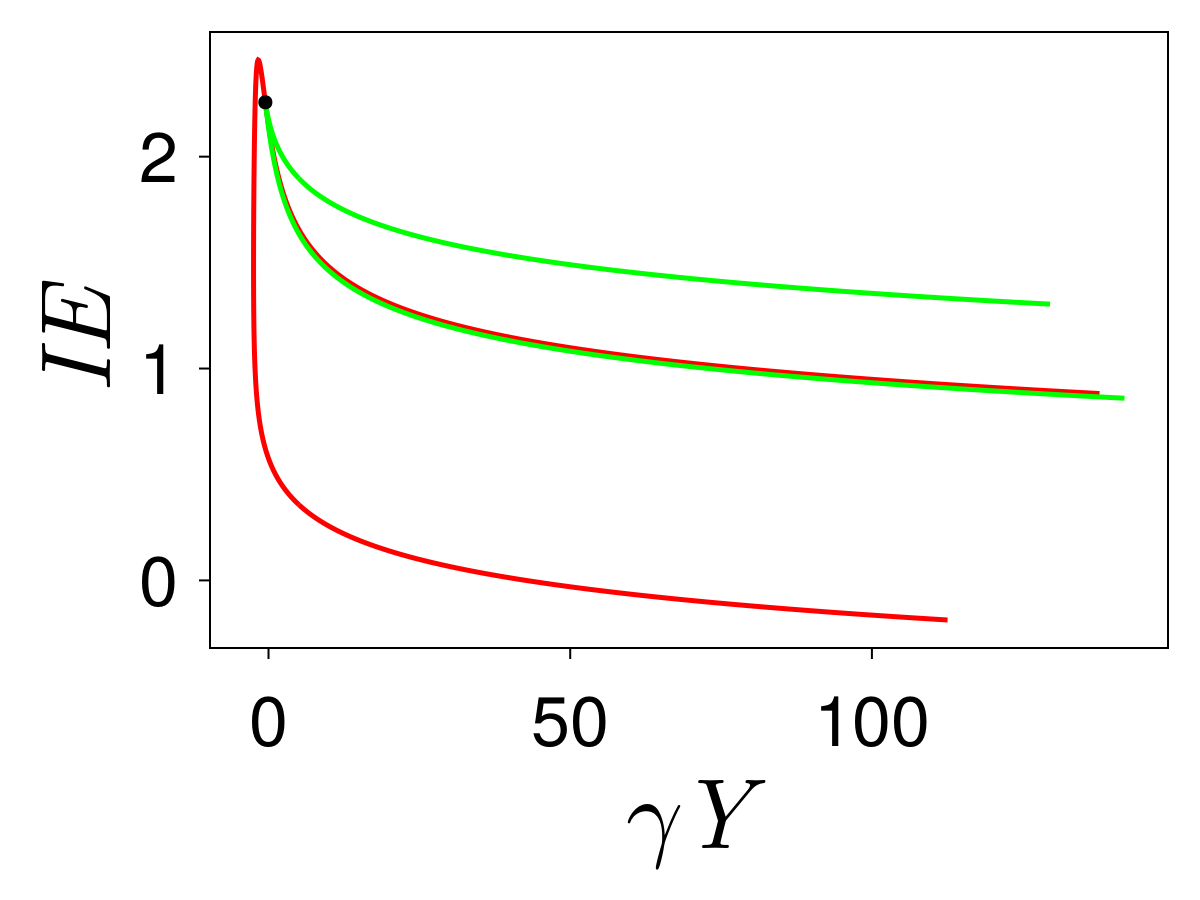

In [29]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 2.5
mksize = 12
colorhopf = :red
colorfold = :lime

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"IE", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

#hm = heatmap!(ax, γYrange, IErange, Λs[:, :, index], colormap = :seismic, colorrange = (mn, mx))

lines!(ax, Hopf_back[7, :], Hopf_back[6, :], color = colorhopf, linewidth = lw)
lines!(ax, Hopf_forward[7, :], Hopf_forward[6, :], color = colorhopf, linewidth = lw)
#-------------------------------------------------------------------------------------
lines!(ax, Fold_for[7, :], Fold_for[6, :], color = colorfold, linewidth = lw)
lines!(ax, Fold_back[7, :], Fold_back[6, :], color = colorfold, linewidth = lw)
#--------------------------------------------------------------------------------------
scatter!(ax, -0.5243, 2.2566, color = :black, markersize = 10)
#xlims!(ax, 0, 10); ylims!(ax, 0, 2)
display(f);

In [5]:
pathtosave = "C:\\Users\\Alex\\Desktop\\rate model\\"
filename = "\\gammaY_IE_params_from_tg_RK4.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}


In [77]:
GLMakie.activate!()
display(GLMakie.Screen(), f);